In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# <center> Intro <center>
1. Problem = how to predict the company will survive or not with company current condition, and we position ourselves as company consultant, and we must give our client insight to keep their company running well
2. Data =
>* what is being predicted? = Company bankruptcy paramater
>* what is needed in prediction? = selecting the feature we have that impact the bankrupt for company, so we can reduce the risk of the company going bankrupt, and can increase the company's chances of continuing to work
3. Machine Learning Objective = Maximize chance to survive
4. Action = dont let the predict fail, we say the company will survive but eventually go bankrupt, and the company will go bankrupt while surviving
5. Value = keep the company from going bankrupt

In [4]:
df = pd.read_csv('data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

as we can see, the data types of our dataset is numerical, there are integer and float type

In [6]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

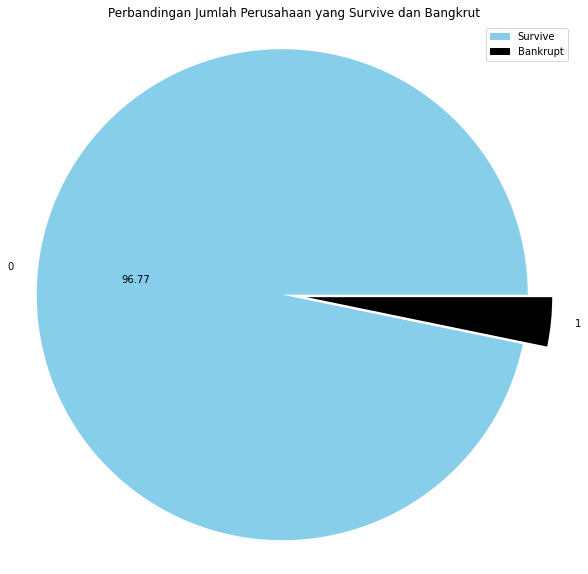

In [24]:
plt.figure(figsize= (10,10))
plt.pie(df['Bankrupt?'].value_counts().tolist(), labels = ['0','1'],autopct = '%.2f',colors=['skyblue','black'] ,explode = (0,0.1))
plt.title('Perbandingan Jumlah Perusahaan yang Survive dan Bangkrut')
plt.legend(['Survive','Bankrupt'])
plt.axis('equal')
plt.savefig("Perbandingan Data.png")
plt.show()

luckily there is no missing value on our dataset

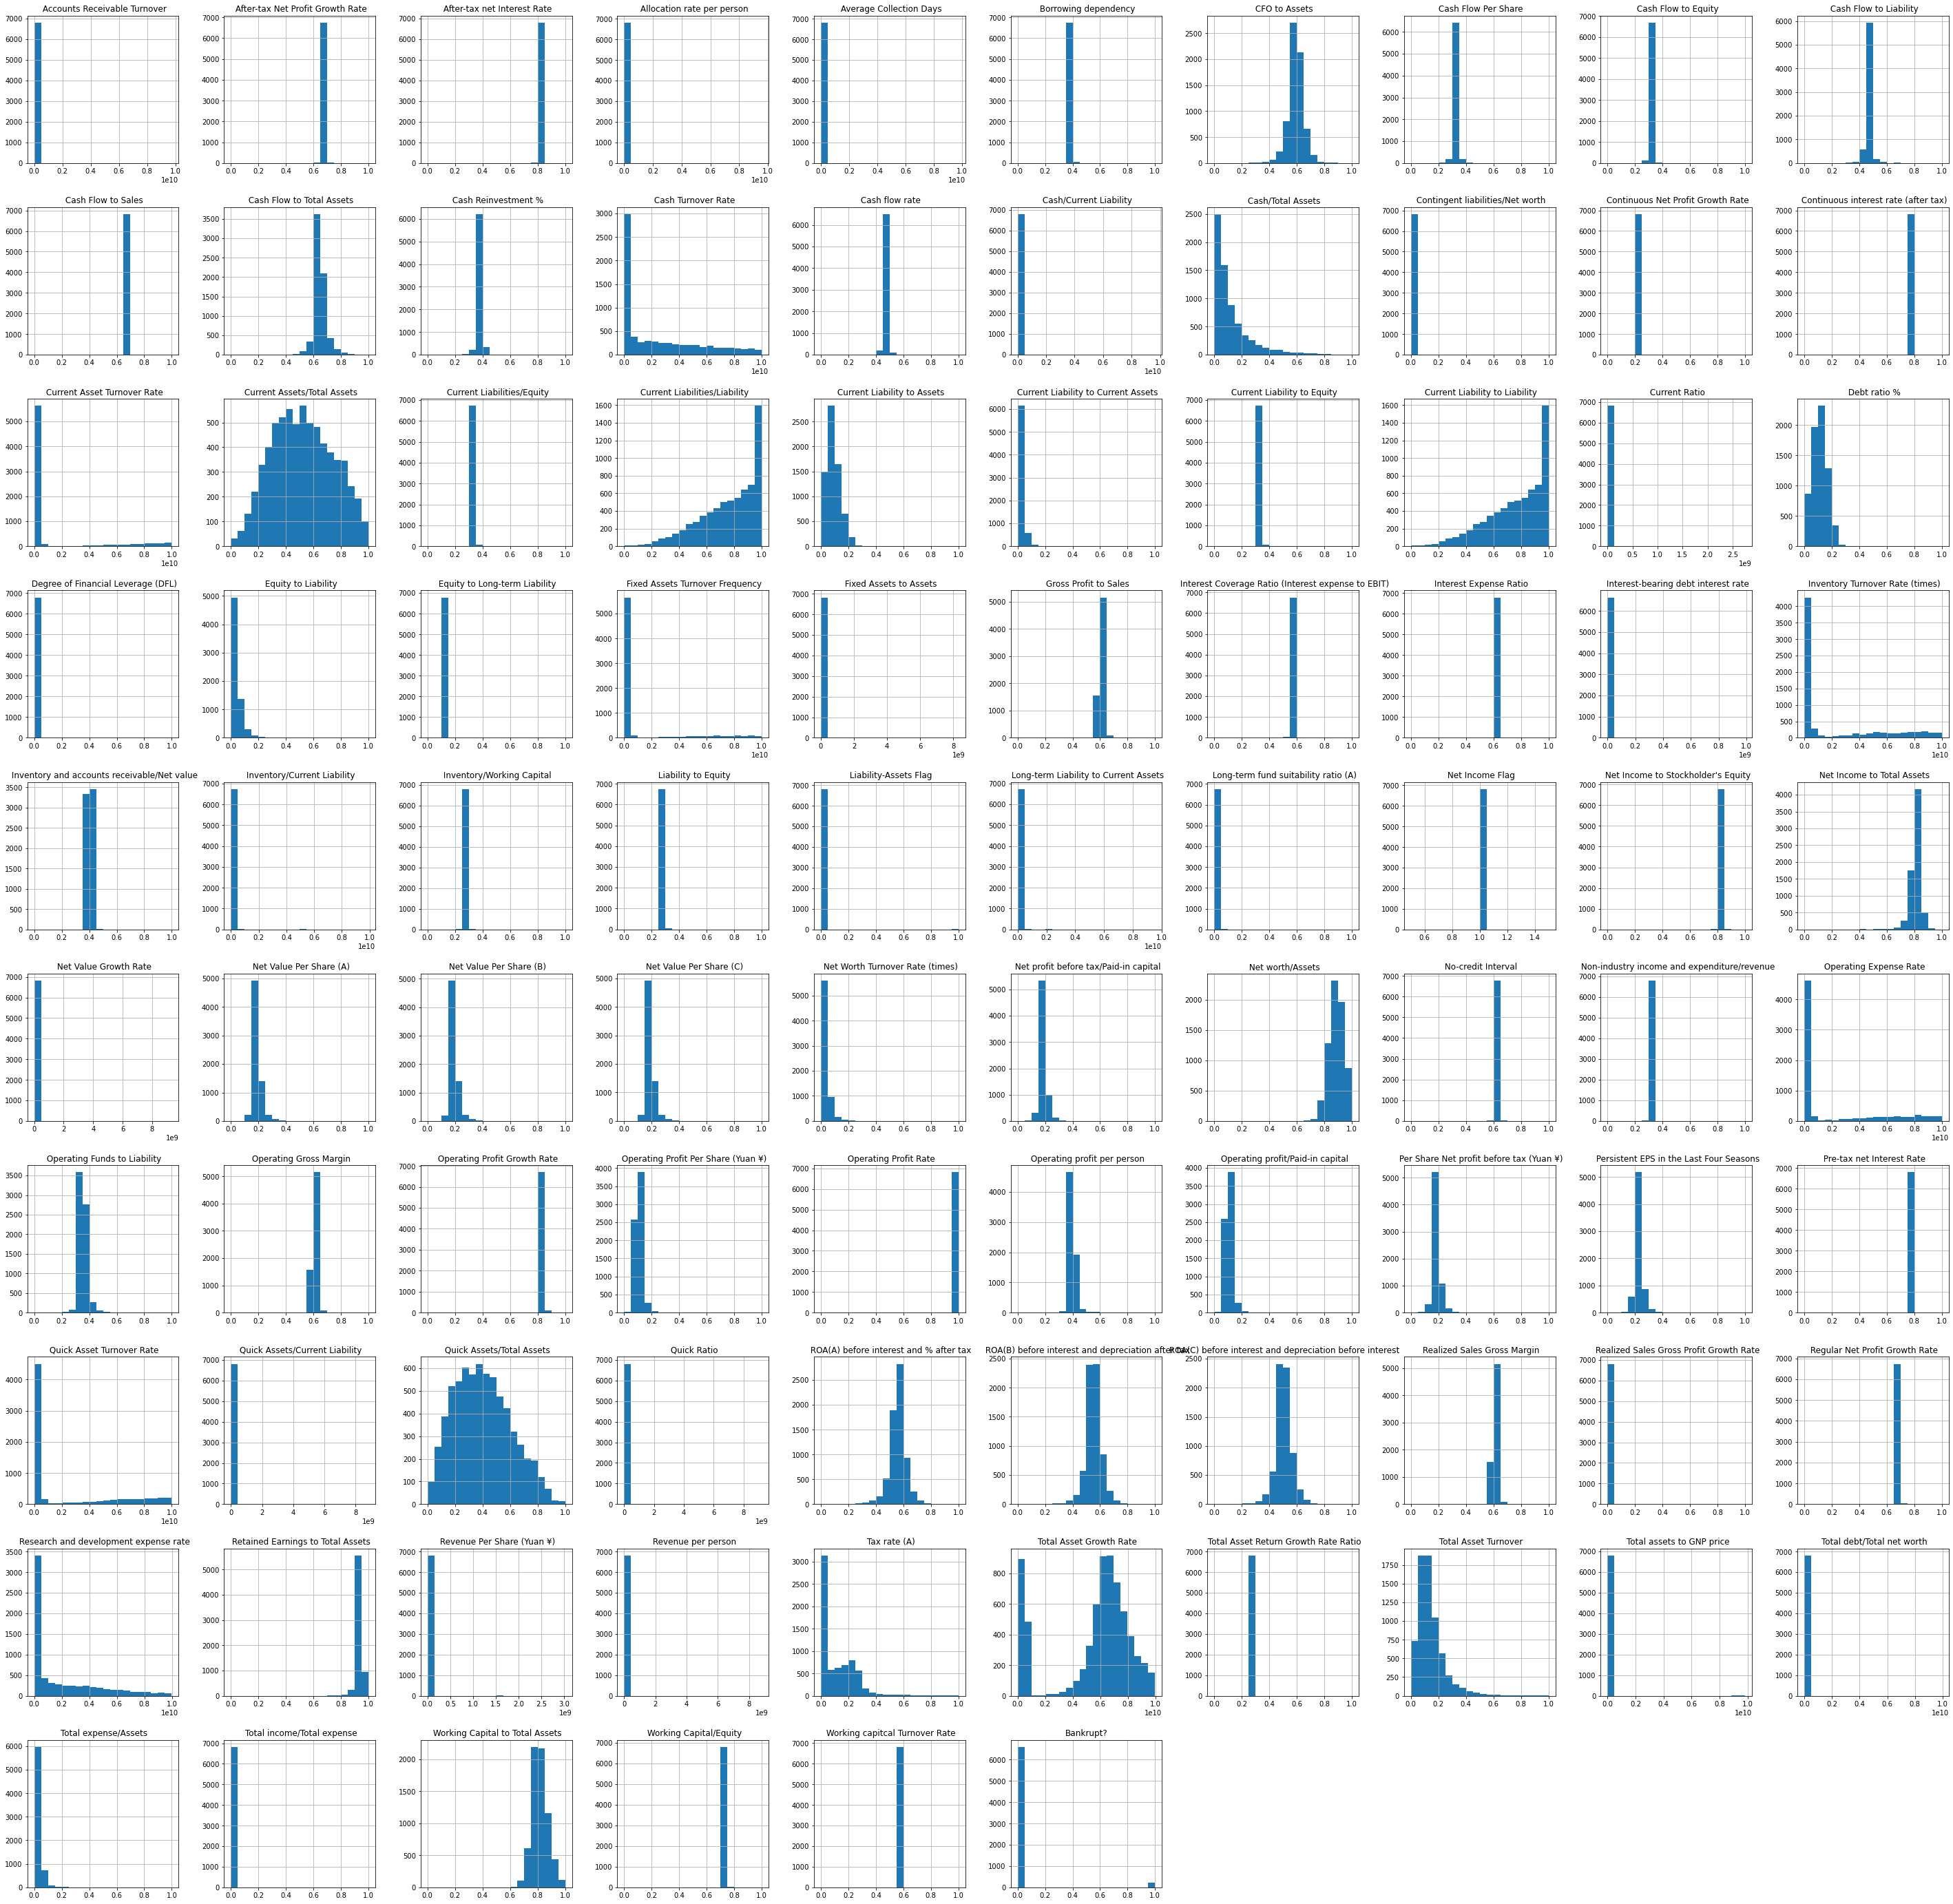

In [8]:
df.hist(figsize=(50,50), bins = 20)
plt.title('Histogram of the selected feature')
plt.show()

Most of the data distribution of the existing features are abnormal, some are right skewed and left skewed, we must normalize the data distribution on the modelling

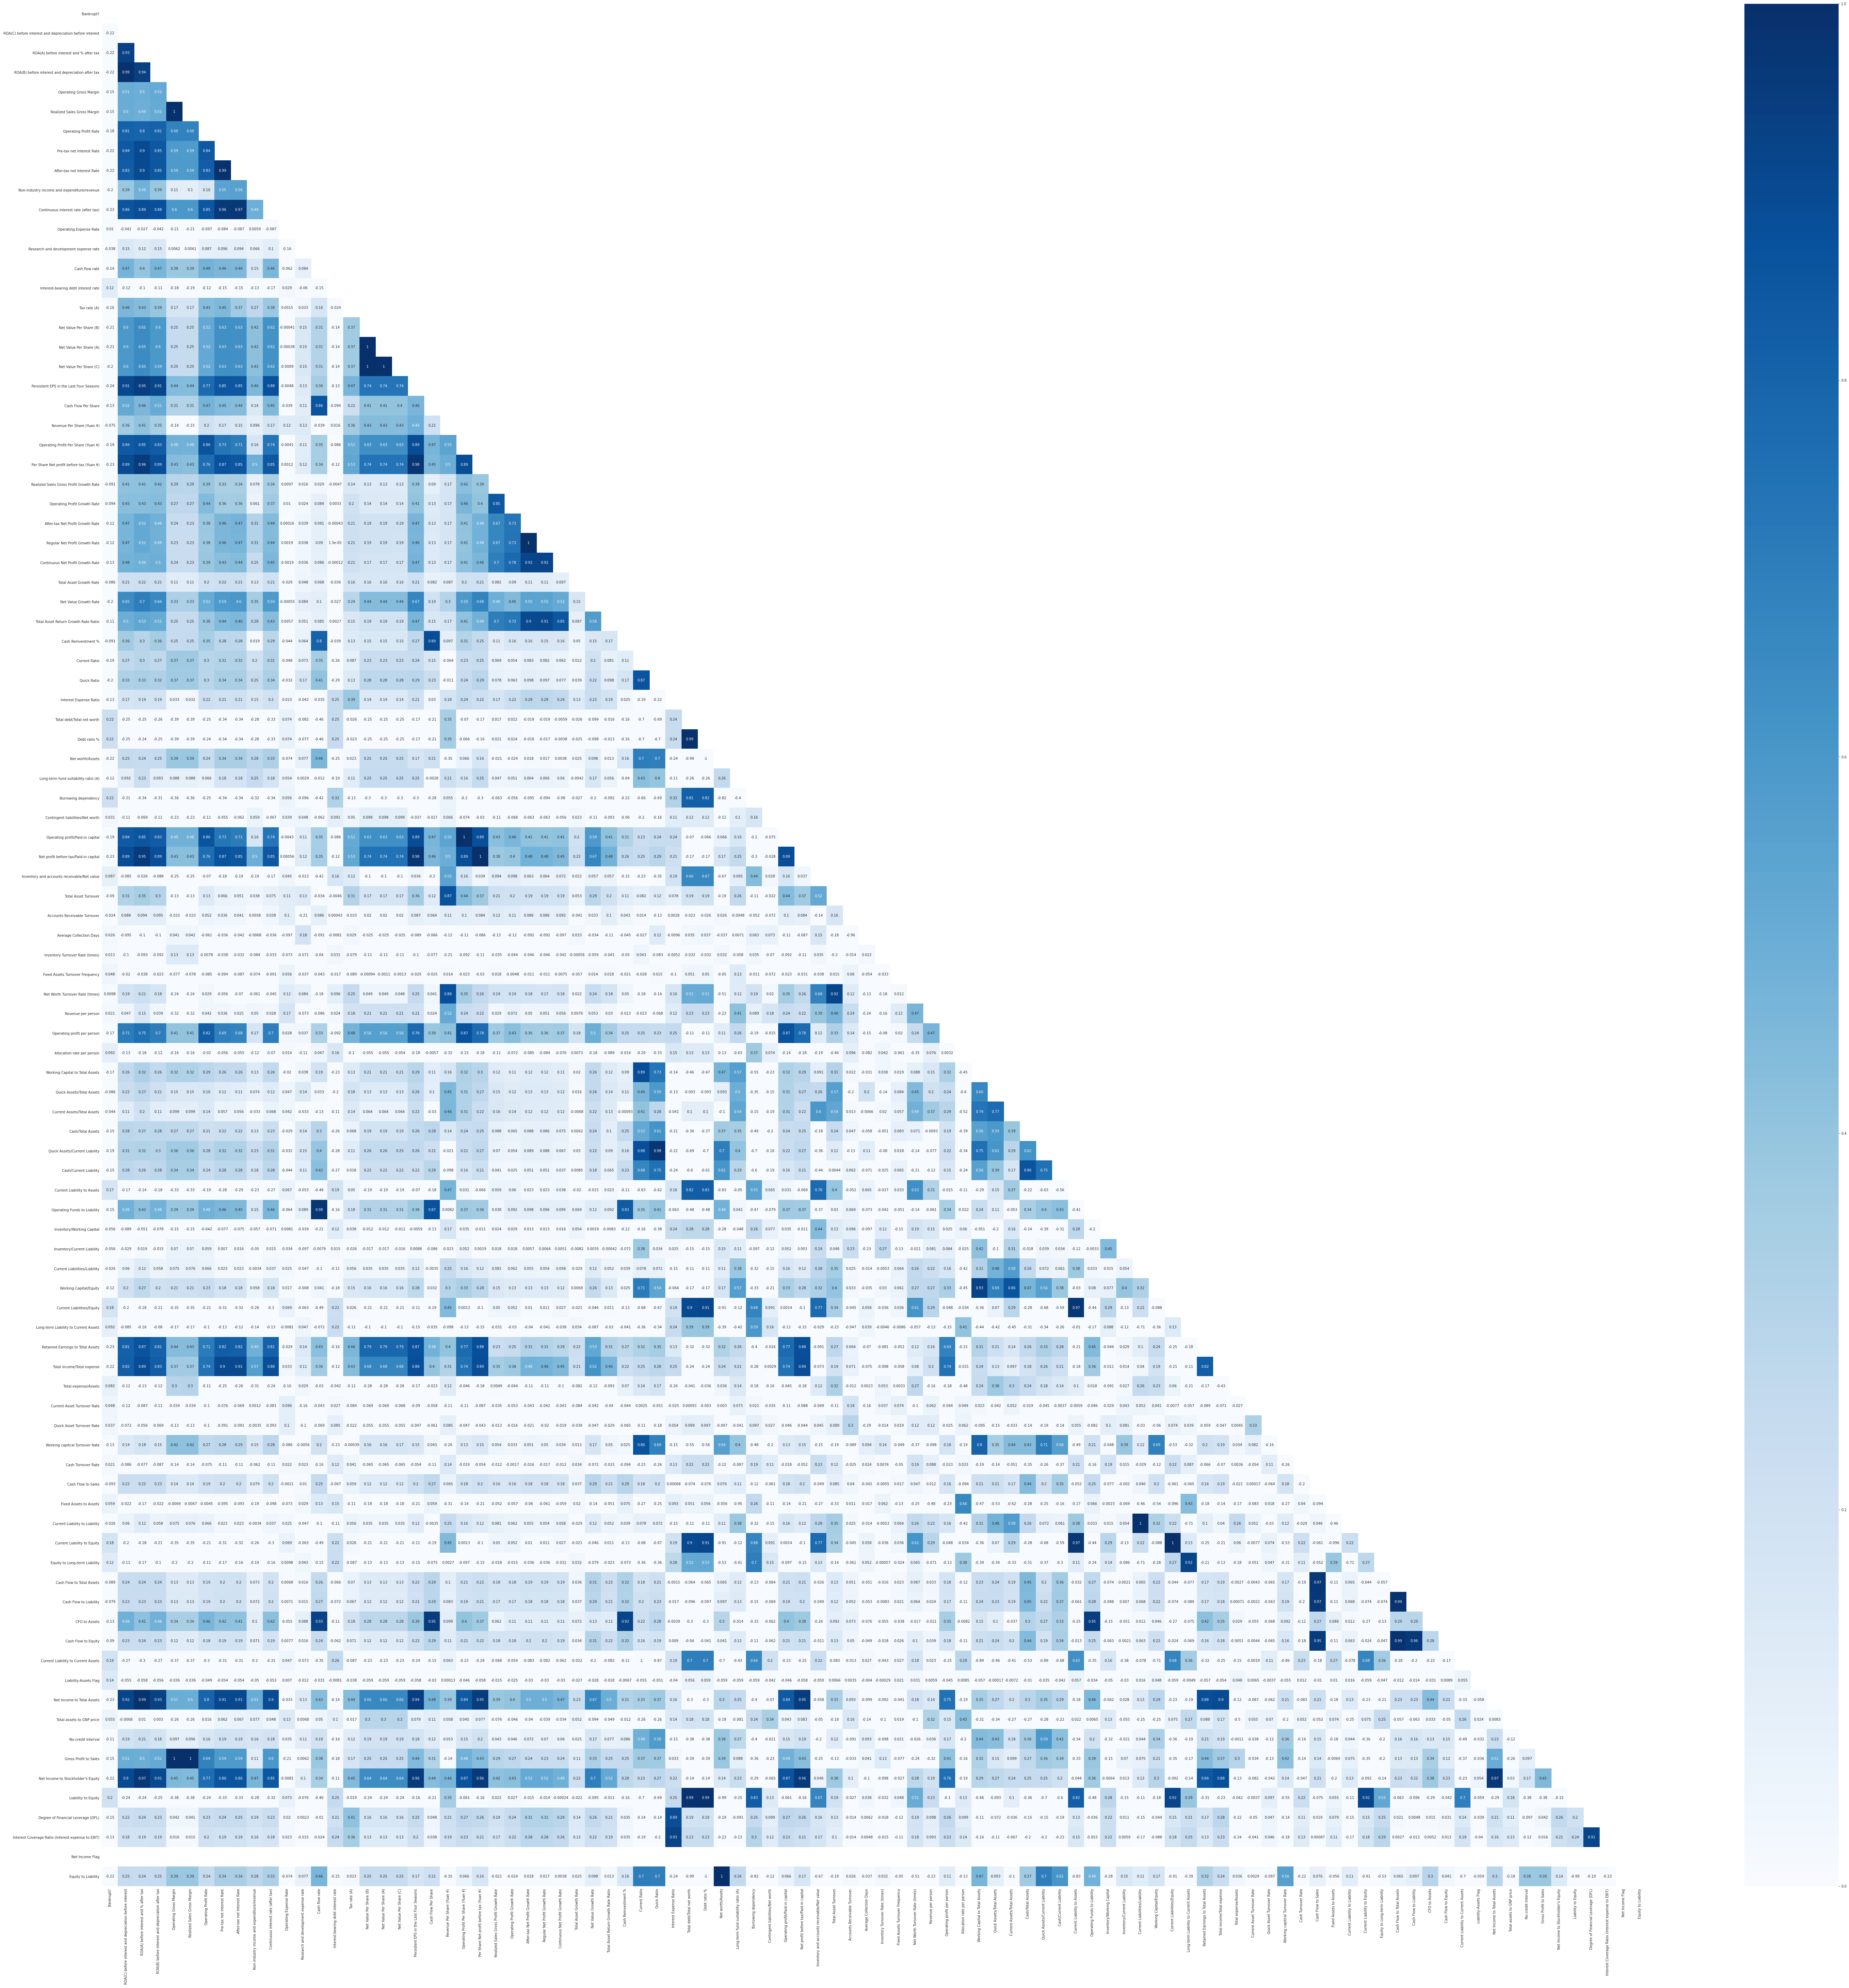

In [8]:
corr = df.corr(method = 'spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(100,100))
with sns.axes_style("white"):
  ax = sns.heatmap(corr, mask=mask,vmin=0., vmax=1,annot = True, cmap='Blues')
plt.savefig("HeatMapSpearmanLast.png")
plt.show()

Pada heatmap diatas kita berfokus kepada feature Bankrupt, dan yang memiliki nilai korelasi (>0.2 dan <-0.2) dengan feature bankrupt adalah :
1. Total debt/Total net worth                            = 0.22
2. Debt ratio %                                          = 0.22
3. Borrowing dependency                                  = 0.22
4. Liability to Equity                                   = 0.2
5. Net Value Growth Rate                                 = -0.2
6. Quick Ratio                                           = -0.2
7. Net Value Per Share (C)                                = -0.2
8. Net Value Per Share (B)                                = -0.21
9. Net Value Per Share (A)                                = -0.21
10. ROA(C) before interest and depreciation before interes = -0.22
11. ROA(A) before interest and % after tax                 = -0.22
12. ROA(B) before interest and depreciation after tax      = -0.22
13. Pre-tax net interest rate                              = -0.22
14. After-tax net Interest Rate                            = -0.22
15. Non-industry income and expenditure/revenue            = -0.22
16. Net worth/Assets                                      = -0.22
17. Equity to Liability                                   = -0.22
18. Continuous interest rate (after tax)                   = -0.23
19. Per Share Net profit before tax (Yuan ¥)              = -0.23
20. Net profit before tax/Paid-in capital                 = -0.23
21. Persistent EPS in the Last Four Seasons               = -0.24

Perbandingan antara perusahaan yang survive dan yang bankrupt sangat tidak seimbang, dimana perusahaan yang survive memiliki presentase 96,77% dari data

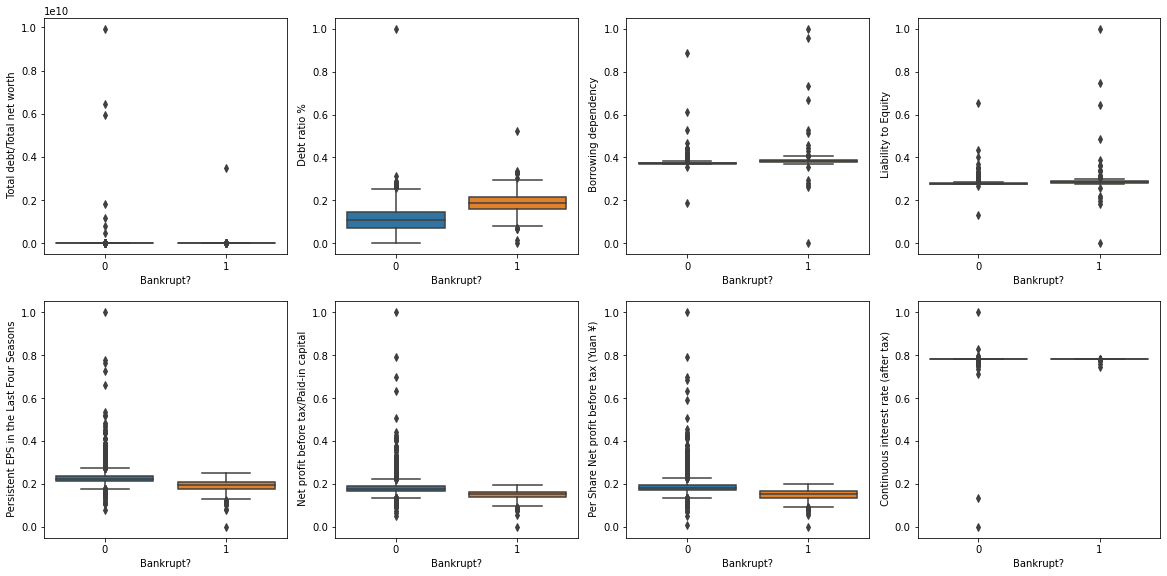

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=df, order=[0, 1])
plt.subplot(4,4,2)
sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=df, order=[0, 1])
plt.subplot(4,4,3)
sns.boxplot(x="Bankrupt?", y=" Borrowing dependency", data=df, order=[0, 1])
plt.subplot(4,4,4)
sns.boxplot(x="Bankrupt?", y=" Liability to Equity", data=df, order=[0, 1])
plt.subplot(4,4,5)
sns.boxplot(x="Bankrupt?", y=" Persistent EPS in the Last Four Seasons", data=df, order=[0, 1])
plt.subplot(4,4,6)
sns.boxplot(x="Bankrupt?", y=" Net profit before tax/Paid-in capital", data=df, order=[0, 1])
plt.subplot(4,4,7)
sns.boxplot(x="Bankrupt?", y=" Per Share Net profit before tax (Yuan ¥)", data=df, order=[0, 1])
plt.subplot(4,4,8)
sns.boxplot(x="Bankrupt?", y=" Continuous interest rate (after tax)", data=df, order=[0, 1])
plt.savefig("Boxplot korelasi.png")

Grafik diatas merupakan perbandingan antara feature feature yang memiliki nilai korelasi tinggi, baik secara positif maupun negatif, kita ambil masing masing 4 tertinggi

Ada 1 yang mencolok yaitu pada grafik debt ratio dan bankrupt, pengertian debt ratio adalah Rasio yang digunakan untuk mengukur seberapa besar perusahaan mengandalkan hutang untuk membiayai asetnya, dan perusahaan yang bangkrut (kategori 1) rata rata memiliki nilai yang lebih tinggi dibandingkan dengan perusahaan yang survive, semakin tinggi rasionya, semakin besar pula risiko yang terkait dengan operasional perusahaan.

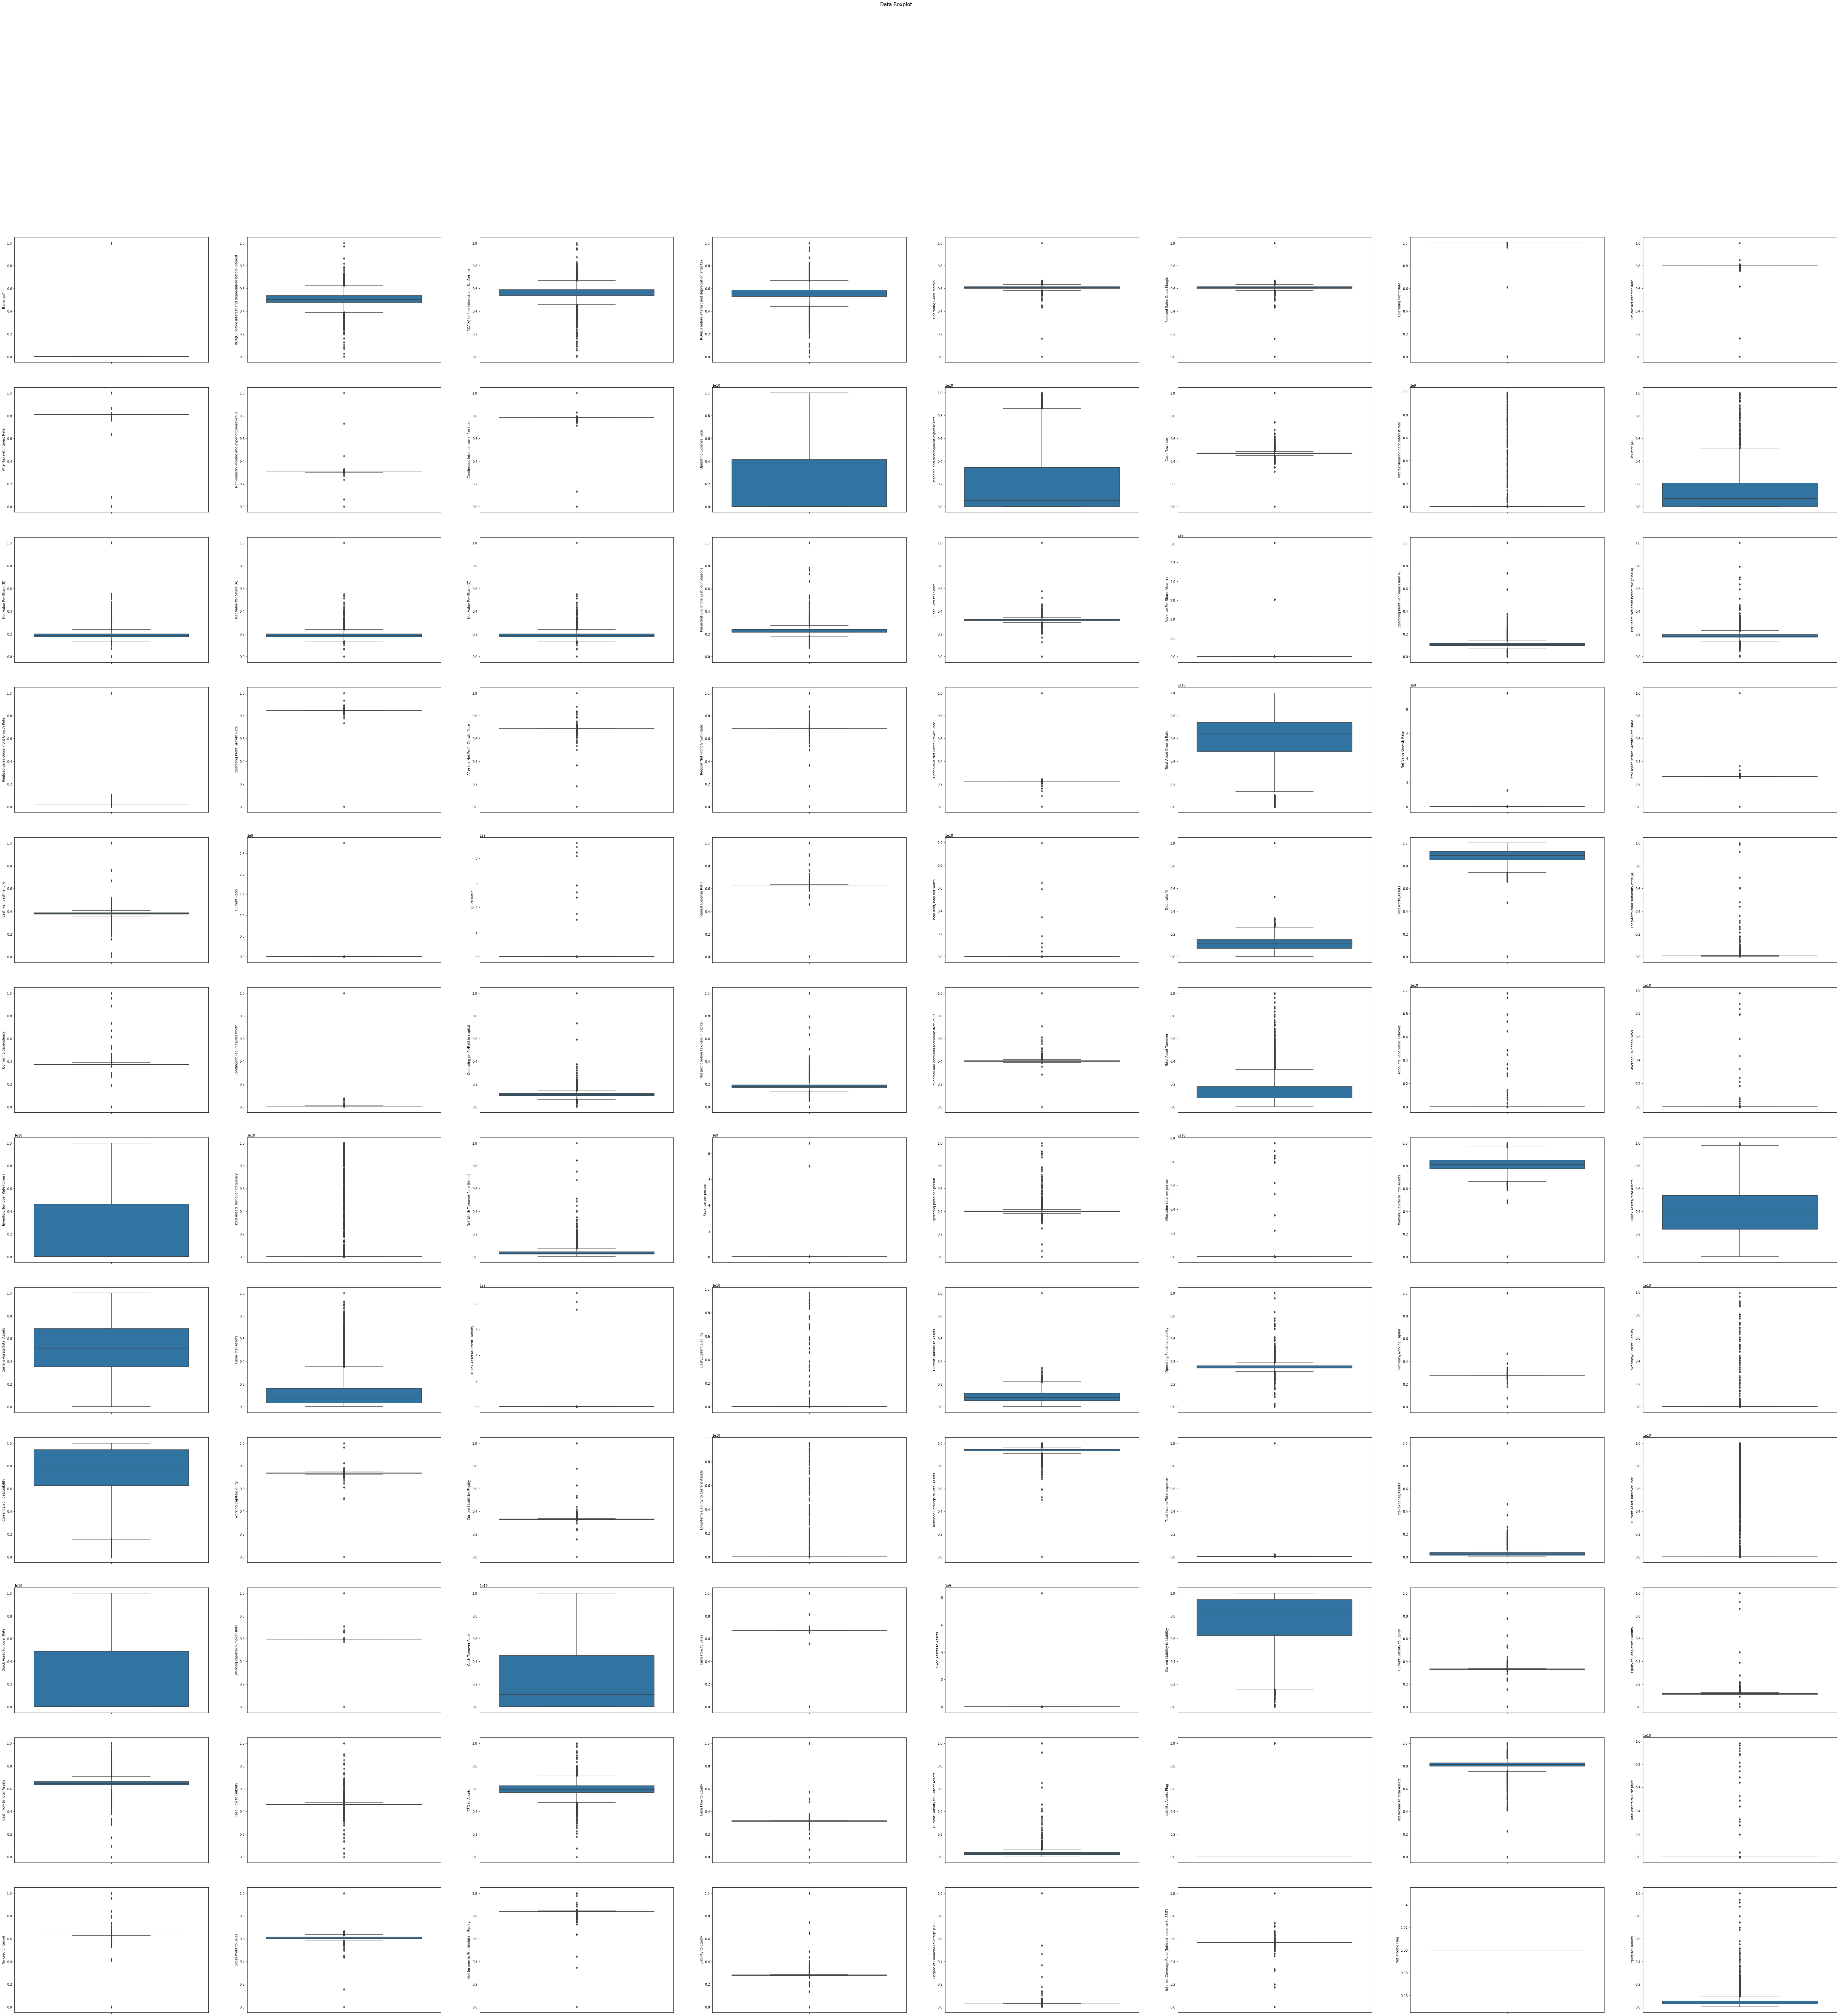

In [12]:
kolom=df.columns
plt.figure(figsize=(100,100))
plt.suptitle('Data Boxplot', size=15)
for i in range(len(kolom)):
    plt.subplot(12,8,i+1)
    sns.boxplot(df[kolom[i]],orient='v')
    plt.grid(False)
    plt.savefig("DataBoxPlot.png")

all of the feature is not normally distributed, except for :
1. current assets/total assets
2. Inventory Turnover Rate (times)
3. Cash Turnover Rate
4. Quick Asset Turnover Rate
5. Operating Expense Rate

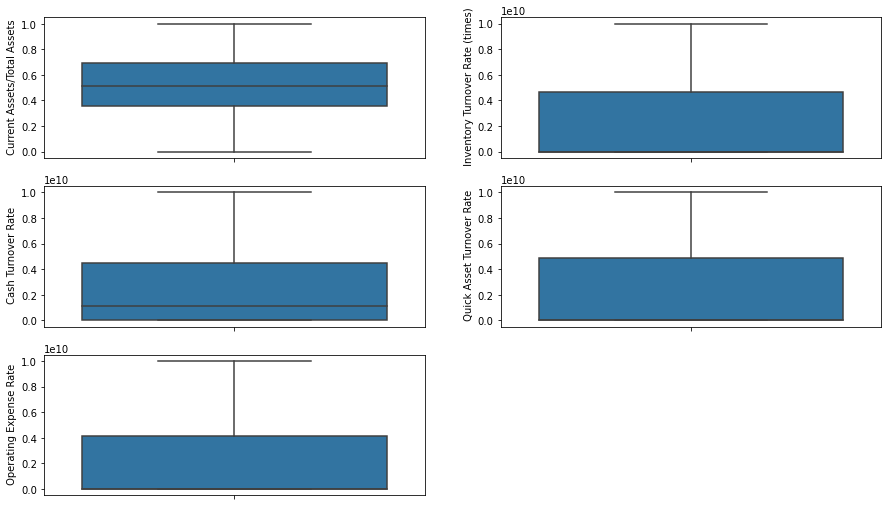

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
sns.boxplot(df[' Current Assets/Total Assets'], orient = 'v')
plt.subplot(5,2,2)
sns.boxplot(df[' Inventory Turnover Rate (times)'], orient = 'v')
plt.subplot(5,2,3)
sns.boxplot(df[' Cash Turnover Rate'], orient = 'v')
plt.subplot(5,2,4)
sns.boxplot(df[' Quick Asset Turnover Rate'], orient = 'v')
plt.subplot(5,2,5)
sns.boxplot(df[' Operating Expense Rate'], orient = 'v')

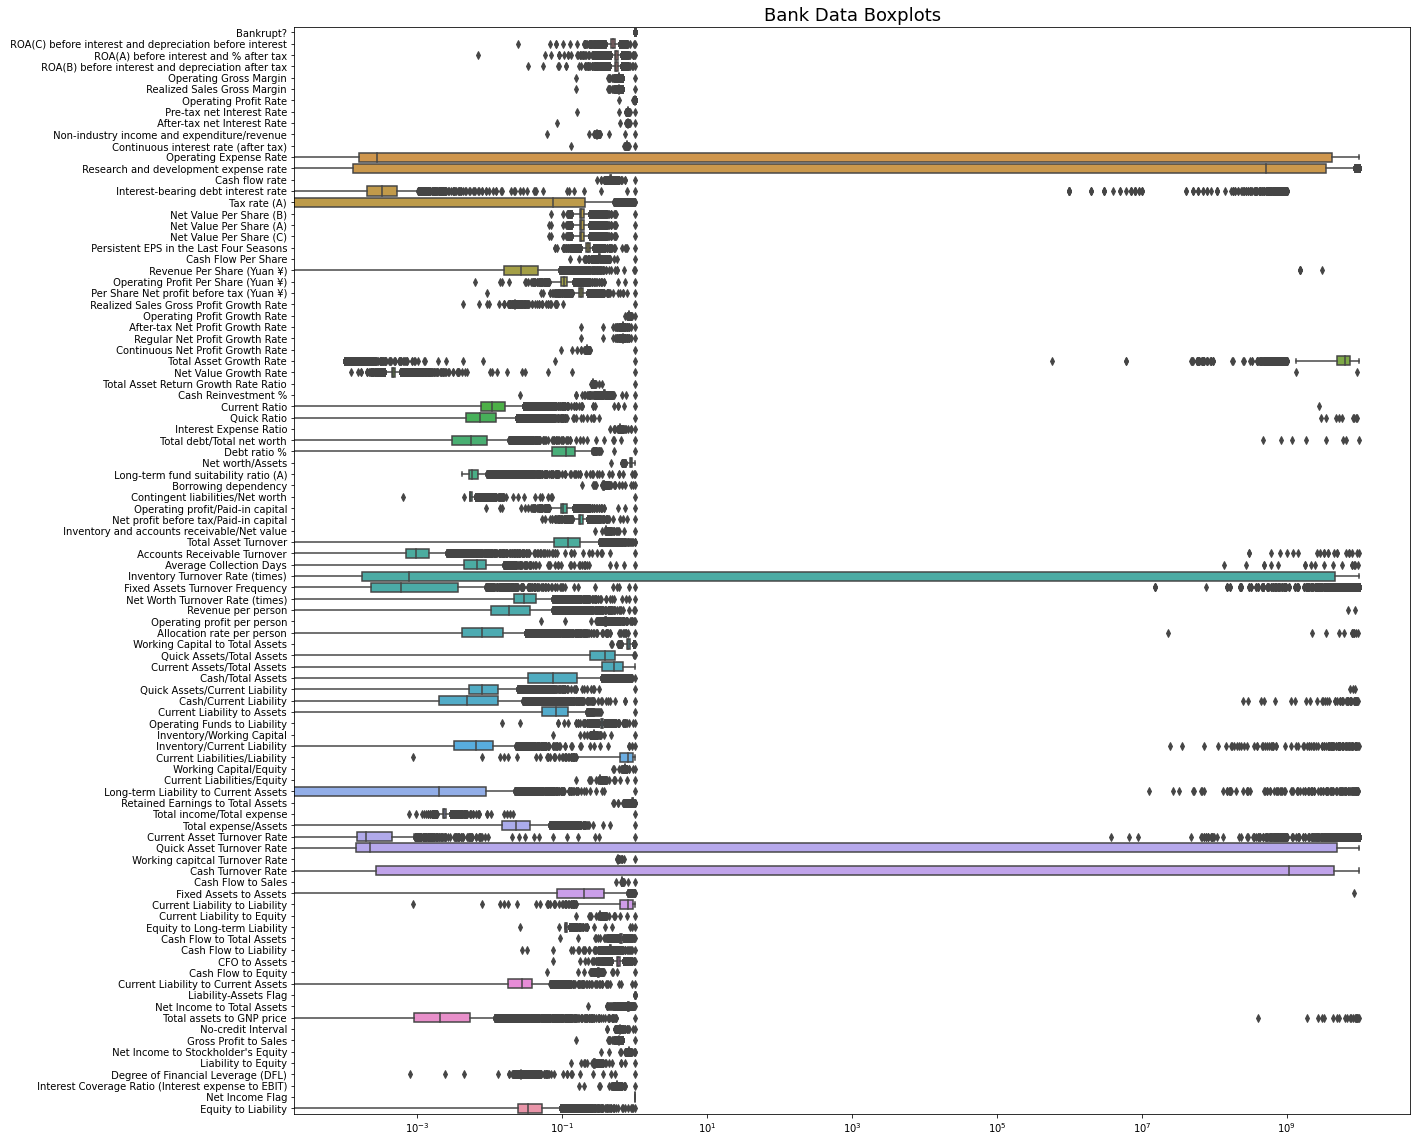

In [6]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

Berdasarkan hasil analisa yang sudah dilakukan terdapat point point yang bisa dicatat diantaranya :
1. Data set tidak berdistribusi secara normal
2. terdapat banyak outlier yang sangat memungkinkan mempengaruhi hasil dari modelling
3. imbalanced dataset, perbandingan 1 dan 0 tidak sebanding, hal ini dapat diatasi dengan metode random over sampling dan smote